In [85]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [86]:
tickers = [
    'AAPL',  # Apple Inc. (Technology)
    'MSFT',  # Microsoft Corporation (Technology)
    'GOOGL', # Alphabet Inc. (Technology)
    'AMZN',  # Amazon.com Inc. (Consumer Discretionary)
    'TSLA',  # Tesla Inc. (Consumer Discretionary)
    'META',    # Meta Platforms Inc. (Communication Services)
    'NFLX',  # Netflix Inc. (Communication Services)
    'NVDA',  # NVIDIA Corporation (Technology)
    'JPM',   # JPMorgan Chase & Co. (Financials)
    'V',     # Visa Inc. (Financials)
    'MA',    # Mastercard Incorporated (Financials)
    'JNJ',   # Johnson & Johnson (Healthcare)
    'UNH',   # UnitedHealth Group Incorporated (Healthcare)
    'PFE',   # Pfizer Inc. (Healthcare)
    'MRK',   # Merck & Co., Inc. (Healthcare)
    'XOM',   # Exxon Mobil Corporation (Energy)
    'CVX',   # Chevron Corporation (Energy)
    'WMT',   # Walmart Inc. (Consumer Staples)
    'KO',    # The Coca-Cola Company (Consumer Staples)
    'PEP',   # PepsiCo Inc. (Consumer Staples)
    'T',     # AT&T Inc. (Telecommunications)
    'VZ',    # Verizon Communications Inc. (Telecommunications)
    'DIS',   # The Walt Disney Company (Communication Services)
    'NKE',   # Nike Inc. (Consumer Discretionary)
    'ADBE',  # Adobe Inc. (Technology)
    'INTC',  # Intel Corporation (Technology)
    'CSCO',  # Cisco Systems Inc. (Technology)
    'BA',    # Boeing Co. (Industrials)
    'CAT',   # Caterpillar Inc. (Industrials)
    'MMM',   # 3M Company (Industrials)
    'MDT',   # Medtronic plc (Healthcare)
    'LMT',   # Lockheed Martin Corporation (Aerospace & Defense)
    'TMO',   # Thermo Fisher Scientific Inc. (Healthcare)
    'AMGN',  # Amgen Inc. (Healthcare)
    'TXN',   # Texas Instruments Incorporated (Technology)
    'QCOM',  # Qualcomm Incorporated (Technology)
    'LRCX',  # Lam Research Corporation (Technology)
    'SBUX',  # Starbucks Corporation (Consumer Discretionary)
    'CHTR',  # Charter Communications Inc. (Communication Services)
    'SPGI',  # S&P Global Inc. (Financials)
    'NOW',   # ServiceNow Inc. (Technology)
    'ZM',    # Zoom Video Communications, Inc. (Communication Services)
    'VRTX',  # Vertex Pharmaceuticals Incorporated (Healthcare)
    'BIIB',  # Biogen Inc. (Healthcare)
    'GILD',  # Gilead Sciences Inc. (Healthcare)
    'NVS',   # Novartis AG (Healthcare)
    'AZN',   # AstraZeneca plc (Healthcare)
    'HSY',   # The Hershey Company (Consumer Staples)
    'MCD',   # McDonald's Corporation (Consumer Discretionary)
    'CPB',   # Campbell Soup Company (Consumer Staples)
    'AMAT',  # Applied Materials, Inc. (Technology)
    'KMB',   # Kimberly-Clark Corporation (Consumer Staples)
]

In [87]:
# Create initial dataframe

start = '2000-01-01'

df = yf.download(tickers,start)

df = df.stack().reset_index()

columns = {column: column.replace(' ', '_').lower() for column in df.columns}

df = df.rename(columns=columns)

df = df.sort_values(['ticker', 'date'])

df = df.reset_index(drop=True)

df

[*********************100%***********************]  52 of 52 completed
/tmp/ipykernel_3461571/2023242775.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack().reset_index()


Price,date,ticker,adj_close,close,high,low,open,volume
0,2000-01-03 00:00:00+00:00,AAPL,0.844004,0.999442,1.004464,0.907924,0.936384,535796800.0
1,2000-01-04 00:00:00+00:00,AAPL,0.772846,0.915179,0.987723,0.903460,0.966518,512377600.0
2,2000-01-05 00:00:00+00:00,AAPL,0.784155,0.928571,0.987165,0.919643,0.926339,778321600.0
3,2000-01-06 00:00:00+00:00,AAPL,0.716296,0.848214,0.955357,0.848214,0.947545,767972800.0
4,2000-01-07 00:00:00+00:00,AAPL,0.750226,0.888393,0.901786,0.852679,0.861607,460734400.0
...,...,...,...,...,...,...,...,...
301950,2024-09-23 00:00:00+00:00,ZM,68.790001,68.790001,68.959999,67.510002,67.660004,2526600.0
301951,2024-09-24 00:00:00+00:00,ZM,69.430000,69.430000,70.169998,68.651001,69.410004,2294700.0
301952,2024-09-25 00:00:00+00:00,ZM,67.949997,67.949997,69.360001,67.785004,68.959999,2479900.0
301953,2024-09-26 00:00:00+00:00,ZM,68.900002,68.900002,69.349998,68.129997,68.430000,2018900.0


In [88]:
# Generate features

df['ret'] = df.groupby('ticker')['adj_close'].pct_change()
df['log_ret'] = np.log(1+df['ret'])

for t in [50,100,150]:
    df[f'ret_{t}'] = df.groupby('ticker')['log_ret'].rolling(t,t).sum().reset_index(drop=True)
    df[f'ret_{t}'] = df.groupby('ticker')[f'ret_{t}'].shift(1)

df = df.dropna().reset_index(drop=True)

df

Price,date,ticker,adj_close,close,high,low,open,volume,ret,log_ret,ret_50,ret_100,ret_150
0,2000-08-08 00:00:00+00:00,AAPL,0.704986,0.834821,0.857143,0.827009,0.856027,176674400.0,-0.024773,-0.025085,0.094090,-0.192697,-0.154895
1,2000-08-09 00:00:00+00:00,AAPL,0.716296,0.848214,0.864955,0.843750,0.859375,379640800.0,0.016043,0.015916,0.079263,-0.262467,-0.091902
2,2000-08-10 00:00:00+00:00,AAPL,0.717238,0.849330,0.864955,0.845982,0.857143,251714400.0,0.001316,0.001315,0.081524,-0.274437,-0.090514
3,2000-08-11 00:00:00+00:00,AAPL,0.719124,0.851563,0.857143,0.813616,0.836496,238056000.0,0.002629,0.002626,0.124375,-0.256992,0.001315
4,2000-08-14 00:00:00+00:00,AAPL,0.709699,0.840402,0.851563,0.827009,0.849888,156660000.0,-0.013106,-0.013193,0.067777,-0.346994,-0.042341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294098,2024-09-23 00:00:00+00:00,ZM,68.790001,68.790001,68.959999,67.510002,67.660004,2526600.0,0.018658,0.018486,0.176563,0.064371,0.053064
294099,2024-09-24 00:00:00+00:00,ZM,69.430000,69.430000,70.169998,68.651001,69.410004,2294700.0,0.009304,0.009261,0.177883,0.118547,0.101990
294100,2024-09-25 00:00:00+00:00,ZM,67.949997,67.949997,69.360001,67.785004,68.959999,2479900.0,-0.021316,-0.021547,0.174288,0.119495,0.124213
294101,2024-09-26 00:00:00+00:00,ZM,68.900002,68.900002,69.349998,68.129997,68.430000,2018900.0,0.013981,0.013884,0.138526,0.078339,0.102177


In [89]:
pivot = df[['date', 'ticker', 'ret']]
pivot = pivot.pivot(index='date', columns='ticker', values='ret')
pivot = pivot.dropna(axis=1, how='any') # Get rid of stocks that are too young

columns = pivot.columns

scaler = StandardScaler()
scaled_pivot = scaler.fit_transform(pivot)
scaled_pivot = pd.DataFrame(columns=columns, data=scaled_pivot)

mse_matrix = pd.DataFrame(index=columns, columns=columns)

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

for a in columns:
    for b in columns:
        mse = compute_mse(scaled_pivot[a], scaled_pivot[b])
        mse_matrix.loc[a, b] = mse

mse_matrix = mse_matrix.astype(float)

mse_matrix.head()

ticker,AAPL,ADBE,AMAT,AMGN,AMZN,AZN,BA,BIIB,CAT,CPB,...,SBUX,SPGI,T,TMO,TXN,UNH,VRTX,VZ,WMT,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,1.130577,1.045409,1.413177,1.237379,1.525050,1.373341,1.519812,1.247046,1.701923,...,1.272696,1.253977,1.452658,1.289841,1.122145,1.483575,1.452644,1.485199,1.454372,1.425503
ADBE,1.130577,0.000000,0.940295,1.325048,1.140373,1.510176,1.321019,1.386868,1.246260,1.686386,...,1.214992,1.189893,1.468058,1.201164,1.000600,1.444550,1.372892,1.426144,1.420485,1.421412
AMAT,1.045409,0.940295,0.000000,1.328901,1.191380,1.517316,1.225312,1.422826,1.117341,1.750297,...,1.209233,1.221132,1.444878,1.199500,0.599504,1.525411,1.397355,1.472248,1.428643,1.345879
AMGN,1.413177,1.325048,1.328901,0.000000,1.430566,1.331709,1.418484,1.122495,1.368596,1.495575,...,1.379700,1.308727,1.377537,1.223202,1.343581,1.340613,1.205892,1.384692,1.375358,1.343124
AMZN,1.237379,1.140373,1.191380,1.430566,0.000000,1.598283,1.454698,1.523760,1.381843,1.780364,...,1.336949,1.363561,1.613409,1.330000,1.243498,1.590797,1.463319,1.526250,1.512435,1.586017


In [90]:
corr = pivot.corr()

corr.head()

ticker,AAPL,ADBE,AMAT,AMGN,AMZN,AZN,BA,BIIB,CAT,CPB,...,SBUX,SPGI,T,TMO,TXN,UNH,VRTX,VZ,WMT,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.434711,0.477295,0.293412,0.381311,0.237475,0.313329,0.240094,0.376477,0.149039,...,0.363652,0.373011,0.273671,0.355079,0.438928,0.258213,0.273678,0.257401,0.272814,0.287248
ADBE,0.434711,1.000000,0.529852,0.337476,0.429813,0.244912,0.339490,0.306566,0.376870,0.156807,...,0.392504,0.405054,0.265971,0.399418,0.499700,0.277725,0.313554,0.286928,0.289758,0.289294
AMAT,0.477295,0.529852,1.000000,0.335550,0.404310,0.241342,0.387344,0.288587,0.441330,0.124851,...,0.395384,0.389434,0.277561,0.400250,0.700248,0.237294,0.301322,0.263876,0.285678,0.327061
AMGN,0.293412,0.337476,0.335550,1.000000,0.284717,0.334146,0.290758,0.438752,0.315702,0.252213,...,0.310150,0.345637,0.311231,0.388399,0.328210,0.329694,0.397054,0.307654,0.312321,0.328438
AMZN,0.381311,0.429813,0.404310,0.284717,1.000000,0.200858,0.272651,0.238120,0.309078,0.109818,...,0.331525,0.318219,0.193296,0.335000,0.378251,0.204602,0.268341,0.236875,0.243783,0.206991


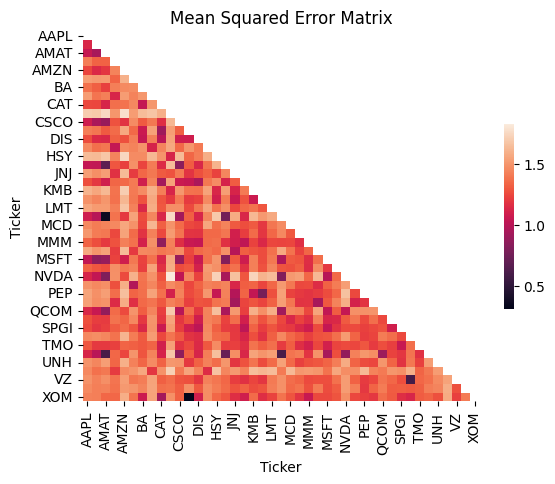

In [91]:
mask = np.triu(np.ones_like(mse_matrix, dtype=bool))

sns.heatmap(mse_matrix, mask=mask, cbar_kws={"shrink": .5})
plt.title("Mean Squared Error Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

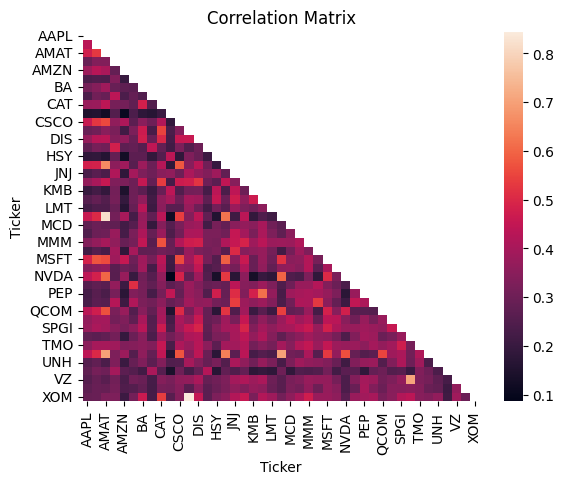

In [92]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask)
plt.title("Correlation Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

In [93]:
# Clustering
# The aggregate dataframe represents the last day of the df dataframe

aggregate = df.groupby('ticker').agg({'ret_50':'last', 'ret_100': 'last', 'ret_150': 'last'})

aggregate.head()

Price,ret_50,ret_100,ret_150
ticker,,,
AAPL,-0.004803,0.218190,0.212806
ADBE,-0.088535,0.058326,-0.042154
AMAT,-0.046782,0.030424,0.052018
AMGN,-0.043685,0.038796,0.126400
AMZN,0.017041,0.026236,0.090728


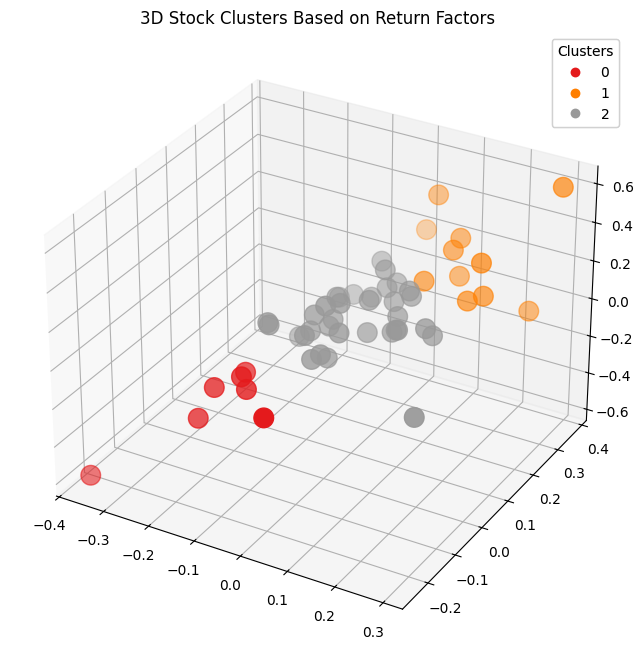

In [94]:
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
scaled_data = scaler.fit_transform(aggregate)

n_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
aggregate['Cluster'] = kmeans.fit_predict(scaled_data)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(aggregate['ret_50'], aggregate['ret_100'], aggregate['ret_150'], c=aggregate['Cluster'], s=200, cmap='Set1')

ax.set_title('3D Stock Clusters Based on Return Factors')
# ax.set_xlabel('50 Day Return')
# ax.set_ylabel('100 Day Return')
# ax.set_zlabel('150 Day Return')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()